<a href="https://colab.research.google.com/github/kvzl/ML100-Days/blob/master/homework/Day_100_transfer_learning_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 作業
礙於不是所有同學都有 GPU ，這邊的範例使用的是簡化版本的 ResNet，確保所有同學都能夠順利訓練!


最後一天的作業請閱讀這篇非常詳盡的[文章](https://blog.gtwang.org/programming/keras-resnet-50-pre-trained-model-build-dogs-cats-image-classification-system/)，基本上已經涵蓋了所有訓練　CNN 常用的技巧，請使用所有學過的訓練技巧，盡可能地提高 Cifar-10 的 test data 準確率，截圖你最佳的結果並上傳來完成最後一次的作業吧!

另外這些技巧在 Kaggle 上也會被許多人使用，更有人會開發一些新的技巧，例如使把預訓練在 ImageNet 上的模型當成 feature extractor 後，再拿擷取出的特徵重新訓練新的模型，這些技巧再進階的課程我們會在提到，有興趣的同學也可以[參考](https://www.kaggle.com/insaff/img-feature-extraction-with-pretrained-resnet)

In [0]:
from urllib.request import urlretrieve

from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

In [0]:
def fetch_script():
    url = 'https://ai100.cupoy.com/HomeworkAction.do?op=getHomeworkFileContent&hwid=D100&filepath=resnet_builder.py'
    urlretrieve(url, './resnet_builder.py')

In [0]:
fetch_script()

from resnet_builder import resnet

In [0]:
def transform_data(x, y):
    x = x.astype('float32')
    x = x / 255
    y = to_categorical(y, 10)
    
    return x, y

In [46]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('x_train.shape: ', x_train.shape)

x_train, y_train = transform_data(x_train, y_train)
x_test, y_test = transform_data(x_test, y_test)

x_train.shape:  (50000, 32, 32, 3)


In [47]:
resnet(input_shape=x_train.shape[1:]).summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_125 (Conv2D)             (None, 32, 32, 16)   448         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_112 (BatchN (None, 32, 32, 16)   64          conv2d_125[0][0]                 
__________________________________________________________________________________________________
activation_111 (Activation)     (None, 32, 32, 16)   0           batch_normalization_112[0][0]    
__________________________________________________________________________________________________
conv2d_126

In [0]:
batch_size = 64
epochs = 10

In [0]:
def train(optimizer=Adam(), batch_size=batch_size, epochs=epochs, callbacks=[]):
    model = resnet(input_shape=x_train.shape[1:])
        
    model.compile(
        loss='categorical_crossentropy',
        metrics=['accuracy'],
        optimizer=optimizer
    )
    
    history = model.fit(
        x_train, y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(x_test, y_test),
        shuffle=True,
        callbacks=callbacks
    )
    
    return history, model

In [0]:
def plot(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    
    ax[0].plot(loss, linestyle='-')
    ax[0].plot(val_loss, linestyle='--')
    ax[0].set_ylabel('Loss')
    ax[1].plot(acc, linestyle='-')
    ax[1].plot(val_acc, linestyle='--')
    ax[1].set_ylabel('Accuracy')
    
    plt.tight_layout()
    plt.show()

In [64]:
history, model = train()

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 64s 1ms/step - loss: 1.8586 - acc: 0.5034 - val_loss: 1.9314 - val_acc: 0.4732
Epoch 2/10
50000/50000 [==============================] - 47s 930us/step - loss: 1.3479 - acc: 0.6561 - val_loss: 1.5267 - val_acc: 0.5787
Epoch 3/10
50000/50000 [==============================] - 47s 934us/step - loss: 1.1340 - acc: 0.7179 - val_loss: 2.1906 - val_acc: 0.4607
Epoch 4/10
50000/50000 [==============================] - 47s 935us/step - loss: 0.9918 - acc: 0.7632 - val_loss: 1.2788 - val_acc: 0.6806
Epoch 5/10
50000/50000 [==============================] - 46s 916us/step - loss: 0.9003 - acc: 0.7957 - val_loss: 1.0418 - val_acc: 0.7486
Epoch 6/10
50000/50000 [==============================] - 47s 938us/step - loss: 0.8247 - acc: 0.8203 - val_loss: 1.1950 - val_acc: 0.6984
Epoch 7/10
50000/50000 [==============================] - 46s 912us/step - loss: 0.7712 - acc: 0.8376 - val_loss: 1.21

In [66]:
loss, acc = model.evaluate(x_test, y_test)
print('loss: ', loss)
print('acc: ', acc)

10000/10000 [==============================] - 4s 352us/step
loss:  1.2254754497528075
acc:  0.7162


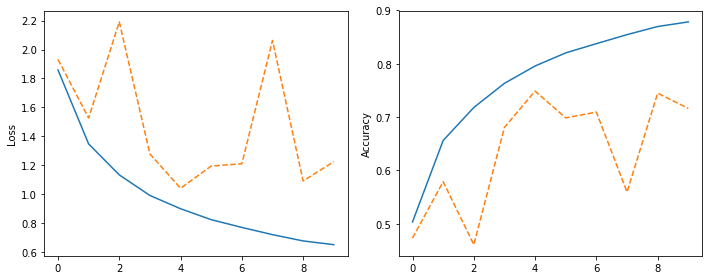

In [65]:
plot(history)

In [68]:
earlystop = EarlyStopping(monitor="val_loss", patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(factor=0.3,min_lr=1e-12, monitor='val_loss', patience=5, verbose=1)

history, model = train(callbacks=[earlystop, reduce_lr])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 64s 1ms/step - loss: 1.6023 - acc: 0.5245 - val_loss: 1.8001 - val_acc: 0.4840
Epoch 2/10
50000/50000 [==============================] - 47s 936us/step - loss: 1.1424 - acc: 0.6720 - val_loss: 1.5122 - val_acc: 0.5632
Epoch 3/10
50000/50000 [==============================] - 46s 916us/step - loss: 0.9984 - acc: 0.7200 - val_loss: 1.2043 - val_acc: 0.6523
Epoch 4/10
50000/50000 [==============================] - 46s 924us/step - loss: 0.8886 - acc: 0.7570 - val_loss: 0.9858 - val_acc: 0.7325
Epoch 5/10
50000/50000 [==============================] - 46s 920us/step - loss: 0.8106 - acc: 0.7873 - val_loss: 0.9400 - val_acc: 0.7524
Epoch 6/10
50000/50000 [==============================] - 46s 927us/step - loss: 0.7511 - acc: 0.8104 - val_loss: 0.8882 - val_acc: 0.7640
Epoch 7/10
50000/50000 [==============================] - 46s 917us/step - loss: 0.6978 - acc: 0.8285 - val_loss: 1.92

In [69]:
loss, acc = model.evaluate(x_test, y_test)
print('loss: ', loss)
print('acc: ', acc)

10000/10000 [==============================] - 4s 355us/step
loss:  0.9707428022384643
acc:  0.7505


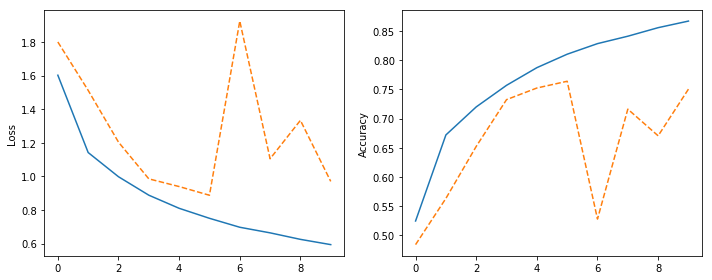

In [70]:
plot(history)